In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("marketing_AB.csv")

In [3]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [6]:
df["user id"].nunique()

588101

In [9]:
df.duplicated(subset = "user id").sum()

0

In [10]:
df.drop(["Unnamed: 0", "user id" ], axis =1, inplace= True)

In [11]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [12]:
df_cat= df[['test group', 'converted', 'most ads day',
       'most ads hour']]

In [16]:
df_cat

,test group,converted,most ads day,most ads hour
0,ad,False,Monday,20
1,ad,False,Tuesday,22
2,ad,False,Tuesday,18
3,ad,False,Tuesday,10
4,ad,False,Friday,14
...,...,...,...,...
588096,ad,False,Tuesday,23
588097,ad,False,Tuesday,23
588098,ad,False,Tuesday,23
588099,ad,False,Tuesday,23


In [14]:
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [21]:
# displaying all categories in different columns
for i in df_cat.columns:
    print(i, ":", df_cat[i].unique())

test group : ['ad' 'psa']
converted : [False  True]
most ads day : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# Univariate analysis

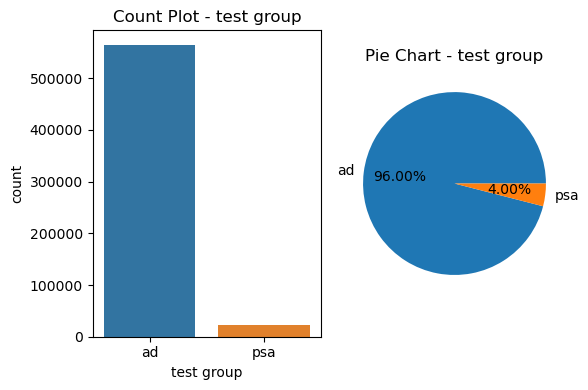

In [79]:
variable= "test group"

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f"Count Plot - {variable}")

plt.subplot(1,2,2)
count = df_cat[variable].value_counts()
plt.pie(count, labels=count.index, autopct="%0.2f%%")
plt.title(f"Pie Chart - {variable}")

plt.tight_layout()

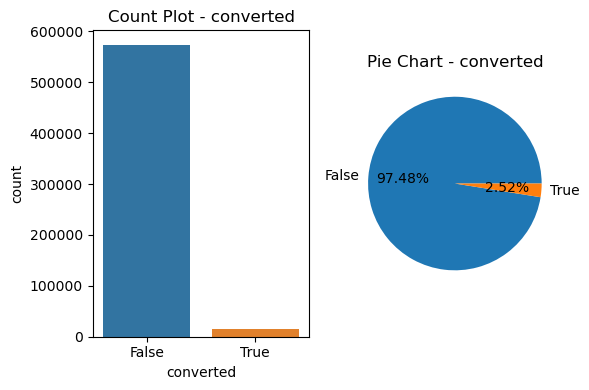

In [80]:
variable= "converted"

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f"Count Plot - {variable}")

plt.subplot(1,2,2)
count = df_cat[variable].value_counts()
plt.pie(count, labels=count.index, autopct="%0.2f%%")
plt.title(f"Pie Chart - {variable}")

plt.tight_layout()

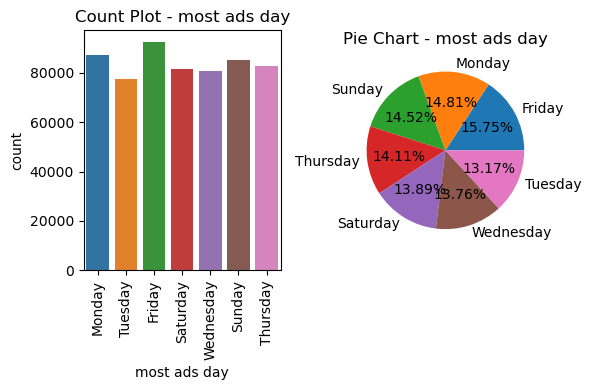

In [82]:
variable= "most ads day"

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat)
plt.title(f"Count Plot - {variable}")
plt.xticks(rotation=90)

plt.subplot(1,2,2)
count = df_cat[variable].value_counts()
plt.pie(count, labels=count.index, autopct="%0.2f%%")
plt.title(f"Pie Chart - {variable}")

plt.tight_layout()

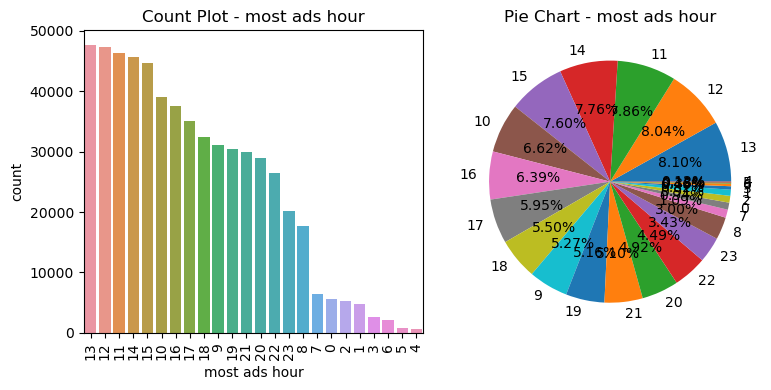

In [94]:
variable= "most ads hour"

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.countplot(x=variable, data=df_cat, order= df_cat[variable].value_counts().index)
plt.title(f"Count Plot - {variable}")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
count = df_cat[variable].value_counts()
plt.pie(count, labels=count.index, autopct="%0.2f%%")
plt.title(f"Pie Chart - {variable}")

plt.tight_layout()

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


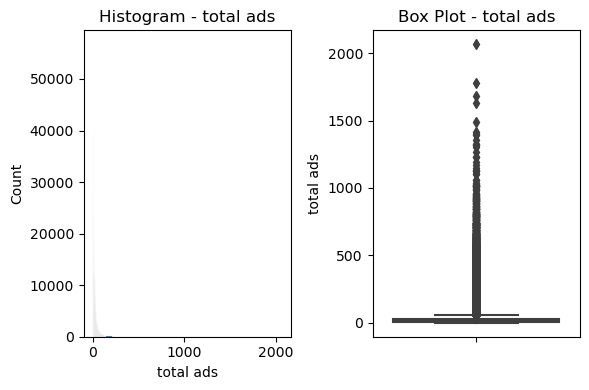

In [104]:
variable= "total ads"

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.histplot(x=variable, data=df)
plt.title(f"Histogram - {variable}")

plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df)
plt.title(f"Box Plot - {variable}")

plt.tight_layout()

In [102]:
df["total ads"].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


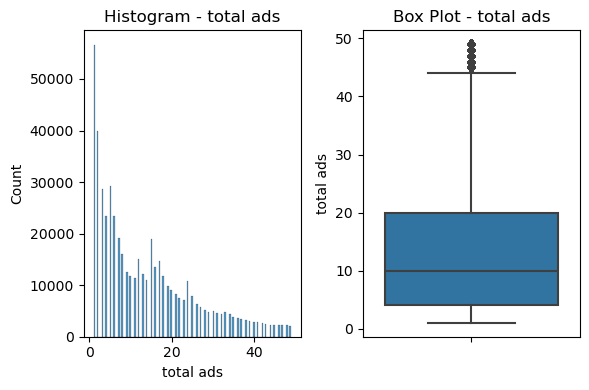

In [106]:
variable= "total ads"

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
sns.histplot(x=variable, data=df[df[variable]<50])
plt.title(f"Histogram - {variable}")

plt.subplot(1,2,2)
sns.boxplot(y=variable, data=df[df[variable]<50])
plt.title(f"Box Plot - {variable}")

plt.tight_layout()

# Bivariate Analysis

In [107]:
ct_conversion_test_group = pd.crosstab(df["test group"], df["converted"], normalize="index")
ct_conversion_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


<Axes: xlabel='test group'>

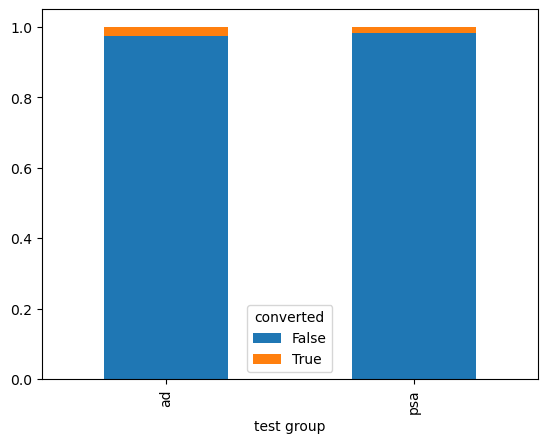

In [108]:
ct_conversion_test_group.plot.bar(stacked = True)

In [114]:
ct_conversion_day = pd.crosstab(df["most ads day"], df["converted"], normalize="index")
ct_conversion_day.sort_values(by=False)

converted,False,True
most ads day,,
Monday,0.967188,0.032812
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942
Sunday,0.975524,0.024476
Friday,0.977788,0.022212
Thursday,0.978429,0.021571
Saturday,0.978949,0.021051


<Axes: xlabel='most ads day'>

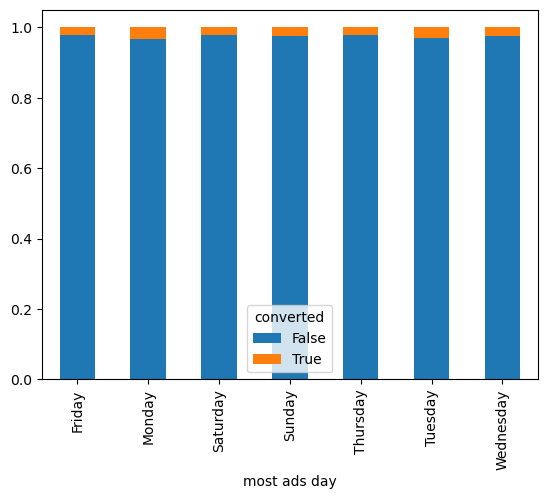

In [117]:
ct_conversion_day.plot.bar(stacked=True)

converted         False     True 
most ads hour                    
16             0.969228  0.030772
20             0.970197  0.029803
15             0.970347  0.029653
21             0.971077  0.028923
17             0.971790  0.028210
14             0.971937  0.028063
18             0.972620  0.027380
19             0.973280  0.026720
22             0.973895  0.026105
13             0.975323  0.024677
12             0.976172  0.023828
23             0.977338  0.022662
6              0.977756  0.022244
11             0.977884  0.022116
10             0.978479  0.021521
5              0.979085  0.020915
8              0.980484  0.019516
9              0.980809  0.019191
0              0.981575  0.018425
7              0.981889  0.018111
4              0.984765  0.015235
1              0.987089  0.012911
3              0.989548  0.010452
2              0.992687  0.007313


<Axes: xlabel='most ads hour'>

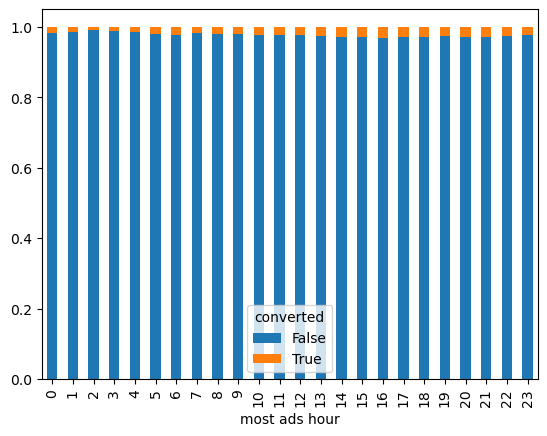

In [120]:
ct_conversion_hour = pd.crosstab(df["most ads hour"], df["converted"], normalize="index")
print(ct_conversion_hour.sort_values(by=False))
ct_conversion_hour.plot.bar(stacked=True)

<Axes: xlabel='converted', ylabel='total ads'>

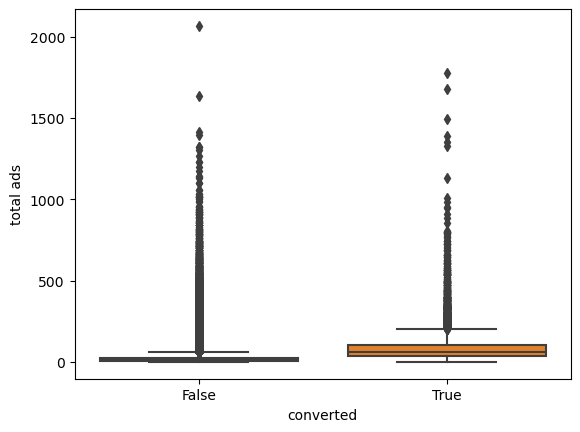

In [121]:
sns.boxplot(x="converted", y="total ads", data=df)

<Axes: xlabel='converted', ylabel='total ads'>

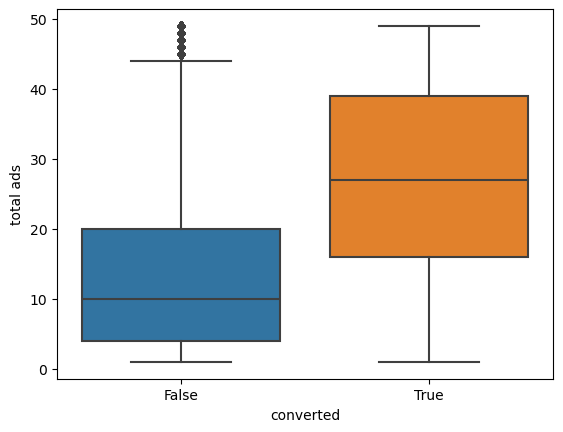

In [123]:
sns.boxplot(x="converted", y="total ads", data=df[df["total ads"]<50])

# Statistical Tests

In [125]:
from scipy.stats import chi2_contingency
alpha= 0.05
for variable in df_cat.columns:
    if variable != "converted":
        contingency_table = pd.crosstab(df_cat[variable], df_cat["converted"])

        chi2, p, _, _ = chi2_contingency(contingency_table)

        print(f"\nChi-squared test for {variable} vs. converted:")
        print(f"Chi-squared value: {chi2}")
        print(f"p-value: {p}")

        if p<alpha:
            print(f"The difference in conversion rates across {variable} is statically significant")
        else:
            print(f"There is no significant difference in conversion rates across {variables}.")


Chi-squared test for test group vs. converted:
Chi-squared value: 54.005823883685245
p-value: 1.9989623063390075e-13
The difference in conversion rates across test group is statically significant

Chi-squared test for most ads day vs. converted:
Chi-squared value: 410.0478857936585
p-value: 1.932184379244731e-85
The difference in conversion rates across most ads day is statically significant

Chi-squared test for most ads hour vs. converted:
Chi-squared value: 430.76869230822086
p-value: 8.027629823696771e-77
The difference in conversion rates across most ads hour is statically significant


In [128]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

#checking assumption
shapiro_stat_true, shapiro_p_value_true = shapiro(df[df["converted"] == True] ["total ads"])
shapiro_stat_false, shapiro_p_value_false = shapiro(df[df["converted"] == False] ["total ads"])

print(f"Shapiro-wilk test for normality (True group): p-value = {shapiro_p_value_true}")
print(f"Shapiro-wilk test for normality (False group): p-value = {shapiro_p_value_false}")

levene_stat, levene_p_value = levene(df[df["converted"]] ["total ads"] , df[~df["converted"]] ["total ads"])
print(f"Levene's test for equality of variances: p-value = {levene_p_value}")

Shapiro-wilk test for normality (True group): p-value = 0.0
Shapiro-wilk test for normality (False group): p-value = 0.0
Levene's test for equality of variances: p-value = 0.0


In [130]:
#Performing a suitable Test
alpha=0.05

if shapiro_p_value_true > alpha and shapiro_p_value_false > alpha and levene_p_value > alpha:
    t_stat, t_p_value = ttest_ind(df[df["converted"]] ["total ads"], df[~df["converted"]]["total ads"])
    print(f"Independent two-sample t-test: p value = {t_p_value}")

else:
    u_stat, u_p_value = mannwhitneyu(df[df["converted"]]["total ads"], df[~df["converted"]]["total ads"])
    print(f"Mann-whitney U test: p-value = {u_p_value}")

Mann-whitney U test: p-value = 0.0
